## Dataloader

In [1]:
from torch.utils.data import TensorDataset, DataLoader
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from SWIDiffusion.diffusion import *

In [2]:
device = "cuda:0"

## Model

In [3]:
model = UNetModel(
    in_channels=1,
    model_channels=64,
    out_channels=1,
    channel_mult=(1, 2, 2, 2),
    num_res_blocks=2
).to(device)

timesteps = 1000

model.load_state_dict(torch.load(f'../Training/data/diffusion-openfwi-step{timesteps}/CurveFault/model.pt',map_location=torch.device(device)))

<All keys matched successfully>

## DDPM


In [4]:
batch_size = 128

gaussian_diffusion = DenoisingDiffusionProbabilisticModel(timesteps=timesteps)


In [5]:
# Generate new images
generated_images = gaussian_diffusion.sample(model, 64, batch_size=batch_size, channels=1)


vp_gen = generated_images[-1].reshape(batch_size, 64, 64)

vp_gen.shape

100%|██████████| 1000/1000 [00:55<00:00, 18.10it/s]


(128, 64, 64)

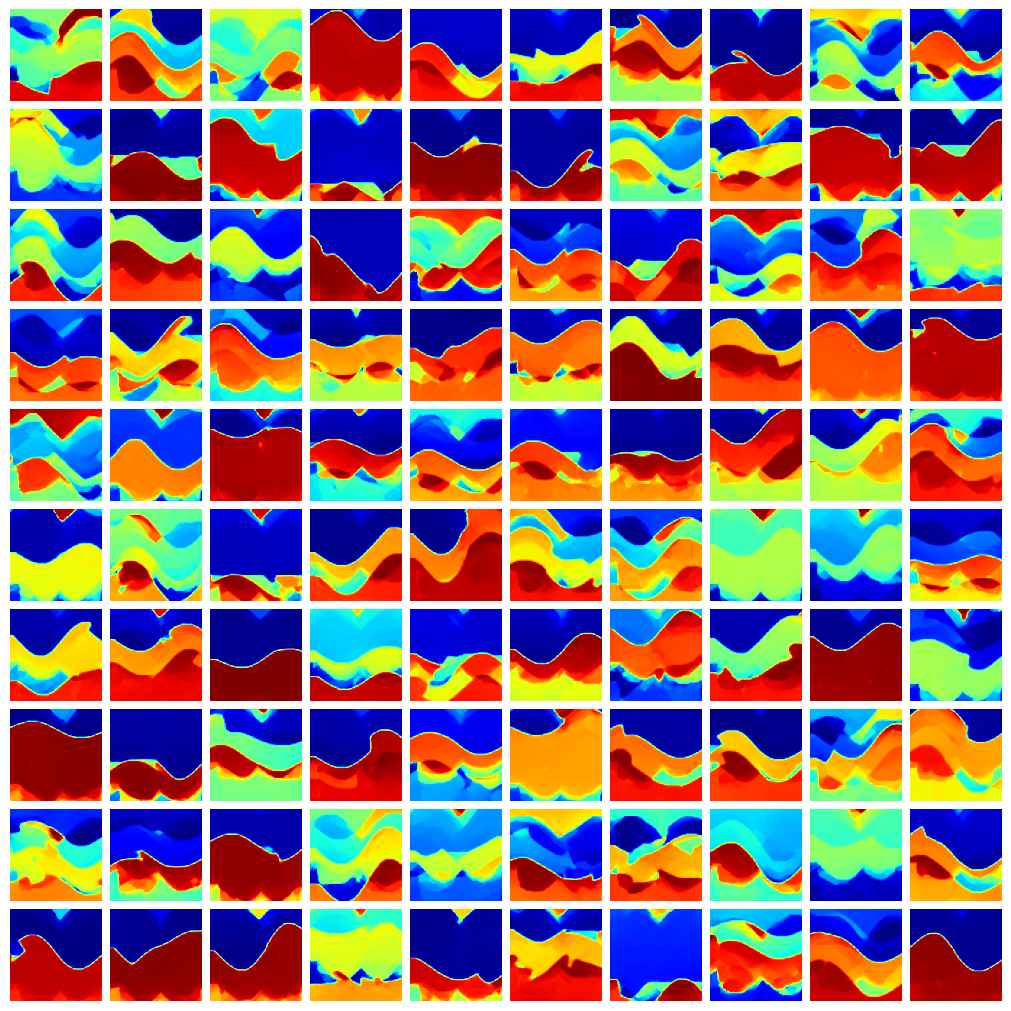

In [6]:
ncols = 10
nrows = 10
fig = plt.figure(figsize=(10, 10), constrained_layout=True)
gs = fig.add_gridspec(nrows, ncols)
for n_row in range(nrows):
    for n_col in range(ncols):
        idx = n_row*ncols+n_col
        f_ax = fig.add_subplot(gs[n_row, n_col])
        f_ax.imshow(vp_gen[idx],cmap='jet')
        f_ax.axis("off")
plt.show()

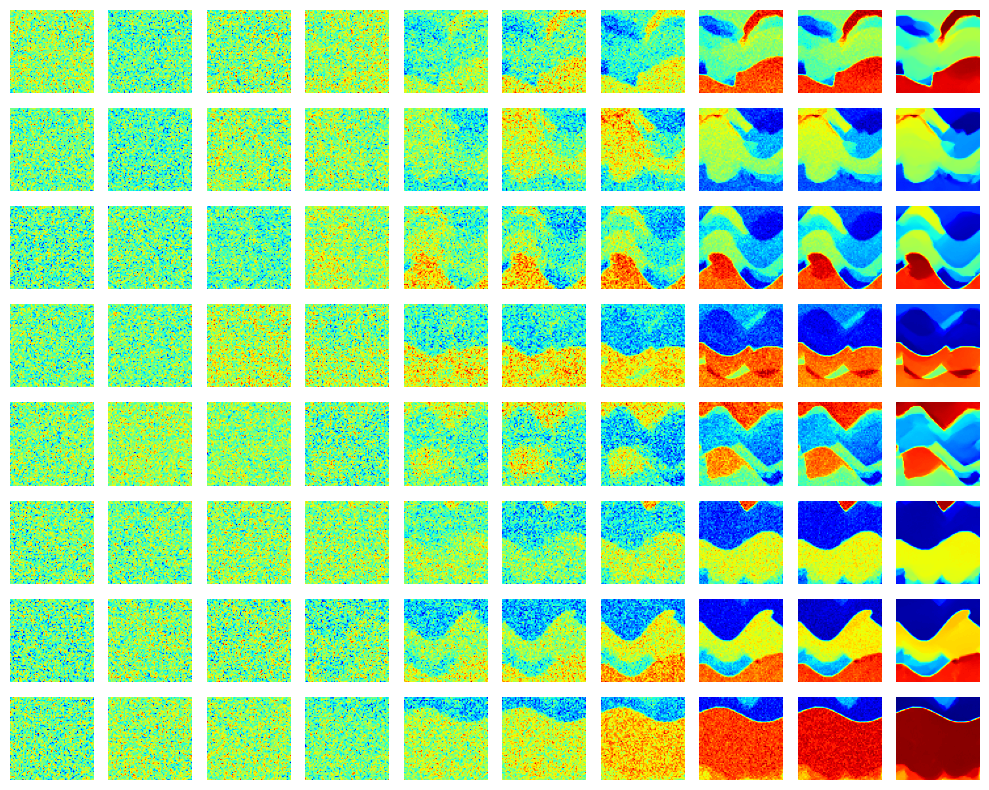

In [7]:
# figure the process of sampling
generated_images = np.array(generated_images)
generated_images.shape

nrows = 8
ncols = 10
model_idxs  = [0,10,20,30,40,50,60,70,80,90]
sample_idxs = [0,300,500,700,900,930,960,990,995,999]

fig,axs = plt.subplots(nrows, ncols, figsize=(10, 8))
for i in range(nrows):
    for j in range(ncols):
        model_idx = model_idxs[i]
        sample_idx = sample_idxs[j]
        axs[i,j].imshow(generated_images[sample_idx][model_idx][0], cmap='jet')
        axs[i,j].axis('off')
plt.tight_layout()
plt.show()